# Spam Email Classifier

In [1]:
# Import Required Libraires

In [82]:
import pandas as pd
import joblib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
import nltk
from nltk.tokenize import sent_tokenize , word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer , PorterStemmer
from sklearn.metrics import accuracy_score , confusion_matrix , recall_score , precision_score , f1_score

In [3]:
dataset = pd.read_csv("Email Data.csv",encoding="latin-1")

In [4]:
dataset.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
dataset.shape

(5572, 5)

In [7]:
# Data PreProcessing

In [8]:
dataset.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [9]:
dataset.duplicated().sum()

403

In [10]:
dataset.drop_duplicates(inplace=True)

In [11]:
dataset.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"],inplace=True)

In [12]:
dataset.rename(columns={"v1":"Label","v2":"Message"},inplace=True)

In [13]:
dataset.head(5)

,Label,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
dataset["Message"][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [15]:
# EDA

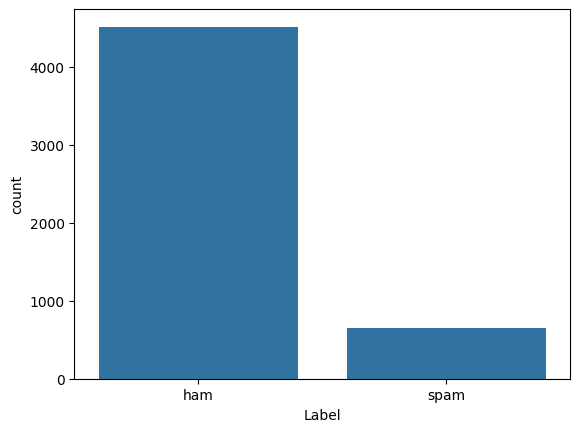

In [16]:
sns.barplot(dataset["Label"].value_counts())
plt.show()

In [17]:
# Encoding

In [18]:
dataset["Label"] = dataset["Label"].map({"ham":0,"spam":1})

In [19]:
# Text PreProcessing

In [24]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words("english"))

In [21]:
def preprocessor(text):

    text = text.lower()
    words = word_tokenize(text)

    processed_words = [

        lemmatizer.lemmatize(word)
        for word in words
        if word.isalpha() and word not in stop_words
    ]
    return " ".join(processed_words)

In [22]:
dataset["Message"] = dataset["Message"].apply(preprocessor)

In [23]:
dataset["Message"][0]

'go jurong point crazy available bugis n great world la e buffet cine got amore wat'

In [25]:
# Vectorization

In [29]:
vectorizer = TfidfVectorizer()
x = vectorizer.fit_transform(dataset["Message"])
y = dataset['Label']

In [30]:
# Train Test Split

In [31]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.2 , random_state=42)

In [34]:
x_train.shape , x_test.shape

((4135, 6632), (1034, 6632))

In [35]:
# Model

In [36]:
model = MultinomialNB()
model.fit(x_train , y_train)

MultinomialNB()

In [37]:
y_pred = model.predict(x_test)

In [53]:
print(f"Accuracy Score : {accuracy_score(y_pred , y_test)*100}")
print(f"Recall Score : {recall_score(y_pred , y_test)*100}")
print(f"Precision Score : {precision_score(y_pred , y_test)*100}")
print(f"F1 - Score : {f1_score(y_pred , y_test)*100}")
print(f"Training Accuracy : {model.score(x_train , y_train)*100}")
print(f"Testing Accuracy : {model.score(x_test , y_test)*100}")

Accuracy Score : 95.93810444874275
Recall Score : 99.04761904761905
Precision Score : 71.72413793103448
F1 - Score : 83.2
Training Accuracy : 96.9770253929867
Testing Accuracy : 95.93810444874275


In [54]:
cm = confusion_matrix(y_pred , y_test)

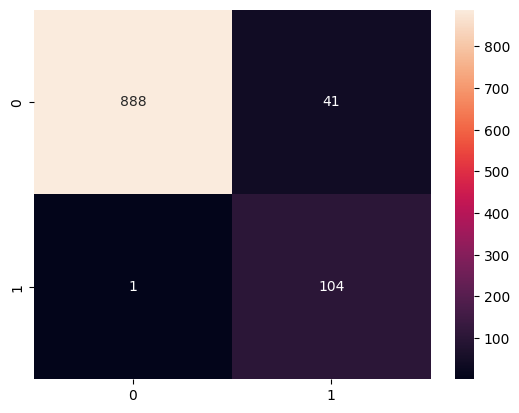

In [58]:
sns.heatmap(cm , annot=True , fmt='g')
plt.show()

In [81]:
msg = "Get discounts on your electricity bill, apply today."
msg_processed = preprocessor(msg)
msg_vector = vectorizer.transform([msg_processed])

prediction = model.predict(msg_vector)

print("Spam 🚫" if prediction[0] == 1 else "Not Spam ✅")

Not Spam ✅


In [85]:
joblib.dump(vectorizer,"Vectorizer.pkl")
joblib.dump(model,"Model.pkl")
print("Saved Successfully.")

Saved Successfully.
